# VARHCPC

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
#dossier de travail
import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

#importation des individus actifs
import pandas as pd
X = pd.read_excel("loisirs_subset.xlsx",sheet_name="data")
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7836 entries, 0 to 7835
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reading          7836 non-null   object
 1   Listening_music  7836 non-null   object
 2   Cinema           7836 non-null   object
 3   Show             7836 non-null   object
 4   Exhibition       7836 non-null   object
 5   Computer         7836 non-null   object
 6   Sport            7836 non-null   object
 7   Walking          7836 non-null   object
 8   Travelling       7836 non-null   object
 9   Playing_music    7836 non-null   object
 10  Collecting       7836 non-null   object
 11  Volunteering     7836 non-null   object
 12  Mechanic         7836 non-null   object
 13  Gardening        7836 non-null   object
 14  Knitting         7836 non-null   object
 15  Cooking          7836 non-null   object
 16  Fishing          7836 non-null   object
 17  TV               7836 non-null   

# ACM sous scientisttools

In [4]:
# ACM
from scientisttools import MCA

my_mca = MCA(n_components=2,benzecri=False,greenacre=False,parallelize=True)
my_mca.fit(X)

MCA(benzecri=False, greenacre=False, n_components=2, parallelize=True)

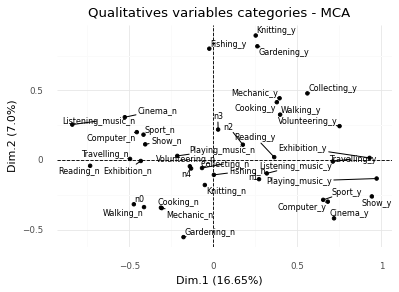

In [5]:
from scientisttools import fviz_mca_mod
p = fviz_mca_mod(my_mca,repel=True)
print(p)

## Classification ascendante hiérarchique sur les modalités

In [6]:
from scientisttools import VARHCPC

varhcpc = VARHCPC(my_mca,n_clusters=3,metric="euclidean",method="ward",parallelize=False)

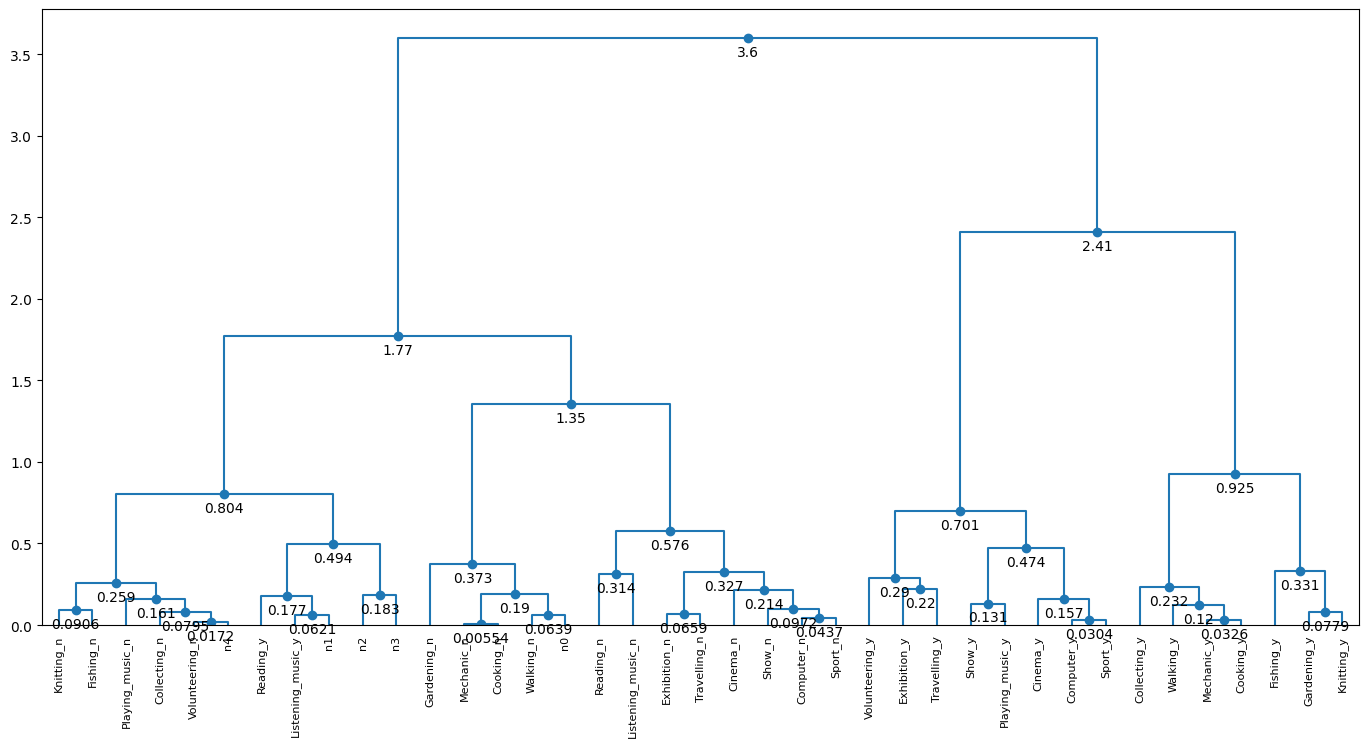

In [7]:
# Dendrogram
from scientisttools import plot_dendrogram
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(17,8))
plot_dendrogram(varhcpc,ax=axe,orientation='top',leaf_rotation=90,color_threshold=0)
plt.show()

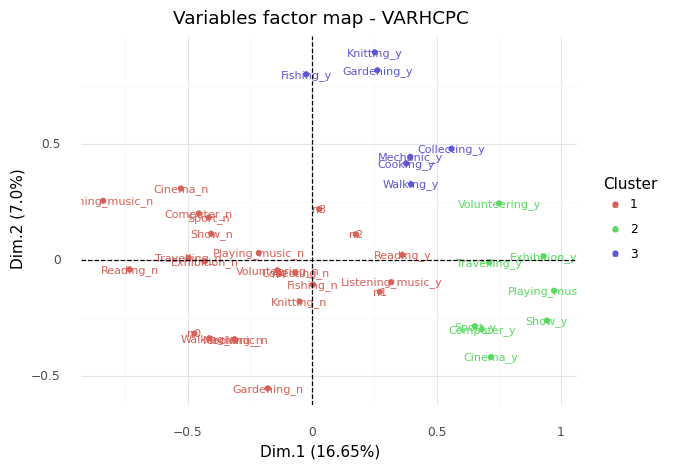

In [8]:
from scientisttools import fviz_varhcpc_cluster
p = fviz_varhcpc_cluster(varhcpc,repel=False,show_clust_cent=False)
print(p)